# Mini-batch Gradient Descent

Mini-batch gradient descent is a variation of the gradient descent optimization algorithm used in machine learning for minimizing the cost function of a model. In traditional gradient descent, the cost function is minimized by computing the gradients of the cost function with respect to the model parameters on the entire training dataset. This can be computationally expensive for large datasets.

In mini-batch gradient descent, the training dataset is divided into small subsets or batches, and the gradient of the cost function is computed for each batch. The model parameters are then updated based on the average of the gradients computed over all the batches.

The batch size is a hyperparameter that determines the number of samples used in each batch. A smaller batch size means that the model parameters are updated more frequently, but the updates may have higher variance, whereas a larger batch size means that the updates are less frequent, but the updates may have lower variance.

Mini-batch gradient descent is a popular optimization algorithm in deep learning because it allows for efficient computation on large datasets and can lead to faster convergence of the model.

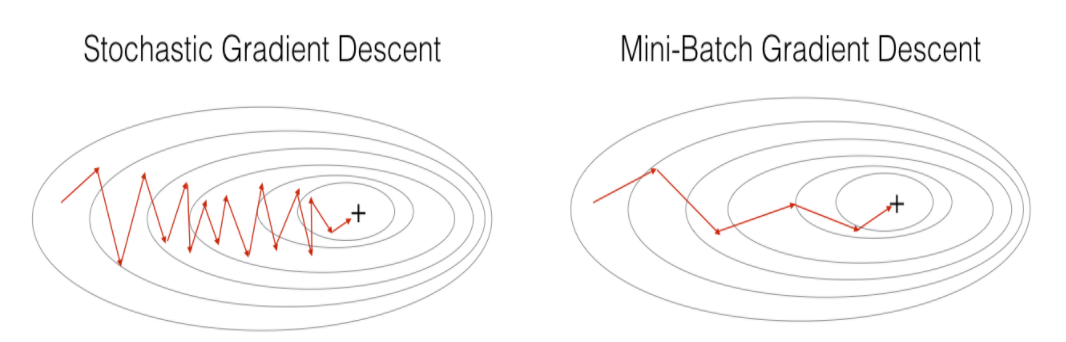



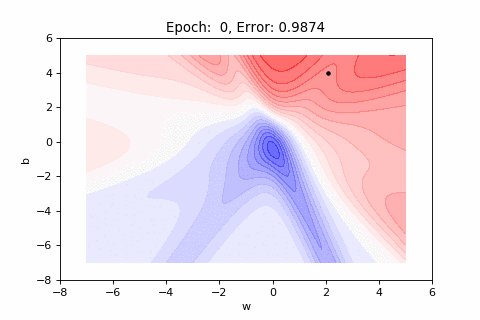

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2)

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print()
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]

151.88334520854633


In [7]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024644

In [8]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [9]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)


In [10]:
mbr.fit(X_train,y_train)

150.29912271928285 [  39.15300963 -141.91765145  441.911424    306.26559758  -14.65573197
  -91.56766768 -189.35137655  120.06791304  420.26776818  103.50239199]


In [11]:
y_pred = mbr.predict(X_test)

In [12]:
r2_score(y_test,y_pred)

0.4500119583963579

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [15]:
batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

In [16]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.3760872919758105

In [17]:
sgd.coef_


array([  53.39633522,  -78.04345941,  333.00571994,  244.32747022,
         25.07049014,  -17.58946159, -170.85401103,  130.48768564,
        309.28083449,  122.05492748])

In [18]:
sgd.coef_

array([  53.39633522,  -78.04345941,  333.00571994,  244.32747022,
         25.07049014,  -17.58946159, -170.85401103,  130.48768564,
        309.28083449,  122.05492748])